In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('./data.csv')

In [17]:
data = np.array(data)
np.random.shuffle(data)

m, n = data.shape

dev_data = data[0:1000].T
X_dev = dev_data[1:n]
Y_dev = dev_data[0]
X_dev = X_dev / 255.

train_data = data[1000:].T
X_train = train_data[1:n]
Y_train = train_data[0]
X_train = X_train / 255.



In [18]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLu(Z):
    return np.maximum(Z, 0)

def deriv_ReLu(Z):
    return Z > 0

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def forward_prop(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[3 6 3 ... 8 3 0] [1 8 1 ... 4 1 0]
0.12490243902439024
Iteration:  10
[8 6 3 ... 9 6 0] [1 8 1 ... 4 1 0]
0.24890243902439024
Iteration:  20
[8 6 3 ... 4 3 0] [1 8 1 ... 4 1 0]
0.3404878048780488
Iteration:  30
[8 6 1 ... 4 3 0] [1 8 1 ... 4 1 0]
0.41809756097560974
Iteration:  40
[8 3 1 ... 4 3 0] [1 8 1 ... 4 1 0]
0.5003658536585366
Iteration:  50
[1 3 1 ... 4 8 0] [1 8 1 ... 4 1 0]
0.5551707317073171
Iteration:  60
[1 8 1 ... 4 1 0] [1 8 1 ... 4 1 0]
0.5960487804878049
Iteration:  70
[1 8 1 ... 4 1 0] [1 8 1 ... 4 1 0]
0.630609756097561
Iteration:  80
[1 8 1 ... 4 1 0] [1 8 1 ... 4 1 0]
0.6630731707317074
Iteration:  90
[1 8 1 ... 4 1 0] [1 8 1 ... 4 1 0]
0.6851951219512196
Iteration:  100
[1 8 1 ... 4 1 0] [1 8 1 ... 4 1 0]
0.7046585365853658
Iteration:  110
[1 8 1 ... 4 1 0] [1 8 1 ... 4 1 0]
0.7202926829268292
Iteration:  120
[1 8 1 ... 4 1 0] [1 8 1 ... 4 1 0]
0.7331219512195122
Iteration:  130
[1 8 1 ... 9 1 0] [1 8 1 ... 4 1 0]
0.7436829268292683
Iteration:  140

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


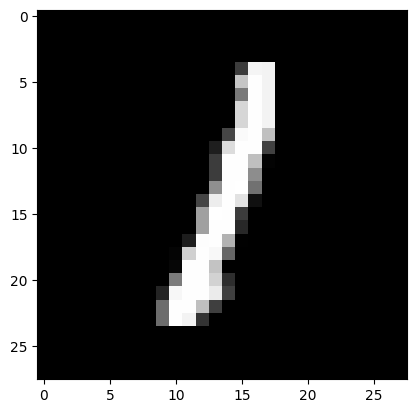

Prediction:  [8]
Label:  8


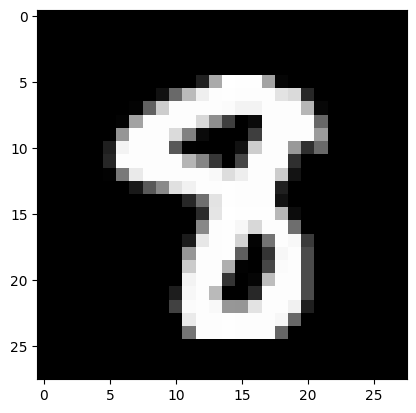

Prediction:  [1]
Label:  1


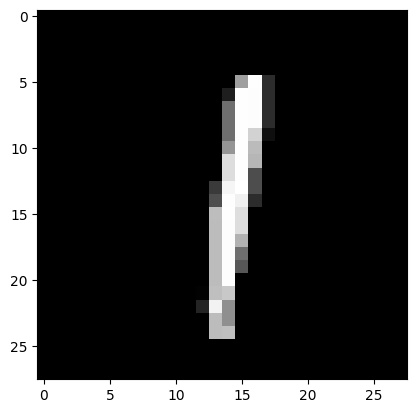

Prediction:  [5]
Label:  5


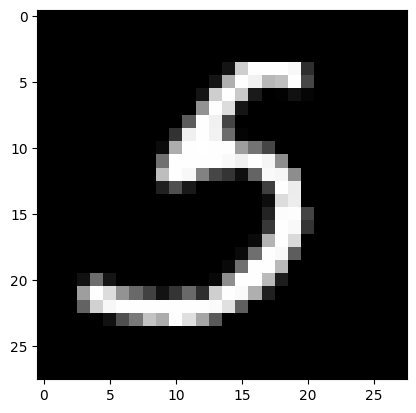

Prediction:  [8]
Label:  8


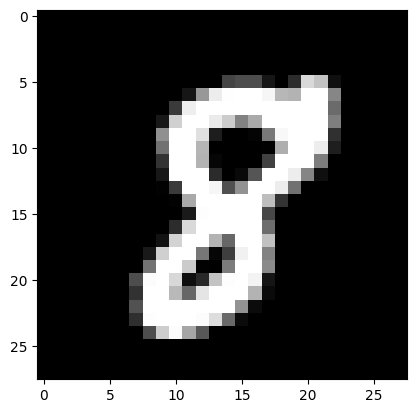

In [22]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)